#  6.5 FINAL Unsupervised Machine Learning_Clustering

# Contents
    1. Importing Libraries
    2. Data prep for k-means, elbow and clustering
    3. The elbow technique
    4. Applying standardization 
    5. k-means clustering/modeling (on standardization)
    6. Cluster Plotting
    7. Summary
    8. Export data
  

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab module- bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/bdigregorio/Desktop/CareerFoundry/Data Immersion/Data Immersion 6/Flavors of Cacao Analysis'

In [4]:
df_fc3_B = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'df_fc3_B.xlsx'))


In [5]:
# check import
df_fc3_B.head()

,Unnamed: 0,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Cocoa Level,Number_of_Ingredients,Ingredient Level,Rating,Rating Level,Ingredients_abbr,Most Memorable Characteristics
0,0,Manoa,U.S.A.,2012,Liberia,"Liberia, batch 174",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molassses, intense, off, herb"
1,1,Manoa,U.S.A.,2012,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.72,Mid percent,3,3,2.75,Mid-level,"B,S,C","oily, tangy, fruit, earthy"
2,2,Manoa,U.S.A.,2012,Peru,"Piura, batch 173",0.72,Mid percent,3,3,3.00,Mid-level,"B,S,C","banana, menthol, medicinal"
3,3,Manoa,U.S.A.,2012,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molasses, sweet, cocoa"
4,4,Nanea,U.S.A.,2013,U.S.A.,Criollo Blend,0.85,High percent,3,3,3.50,Mid-level,NaN,"sandy, spicy, earthy"


In [6]:
df_fc3_B.shape

(2657, 14)

# 2. Data prep for k-means, elbow and clustering

In [7]:
# remove unwanted column and non-numerical columns for k-means
df_fc4 = df_fc3_B.drop(columns = ['Unnamed: 0', 'Company (Manufacturer)','Company Location',
                        'Review Date', 'Country of Bean Origin','Specific Bean Origin or Bar Name',
                        'Cocoa Level','Ingredient Level','Rating Level','Ingredients_abbr',
                        'Most Memorable Characteristics'], inplace=False)


In [8]:
df_fc4.head()

,Cocoa Percent,Number_of_Ingredients,Rating
0,0.72,3,3.25
1,0.72,3,2.75
2,0.72,3,3.00
3,0.72,3,3.25
4,0.85,3,3.50


In [9]:
df_fc4.agg({'Rating' :['mean', 'median'],
                                'Number_of_Ingredients':['mean', 'median'],
                                'Cocoa Percent': ['mean', 'median']})

,Rating,Number_of_Ingredients,Cocoa Percent
mean,3.198532,3.035755,0.716131
median,3.250000,3.000000,0.700000


# 3. The elbow technique

## Determining the cluster range for "Rating" and other exploratory charts

In [10]:
sorted(df_fc4['Rating'].unique().tolist())

[1.0, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0]

<Axes: xlabel='Rating', ylabel='Count'>

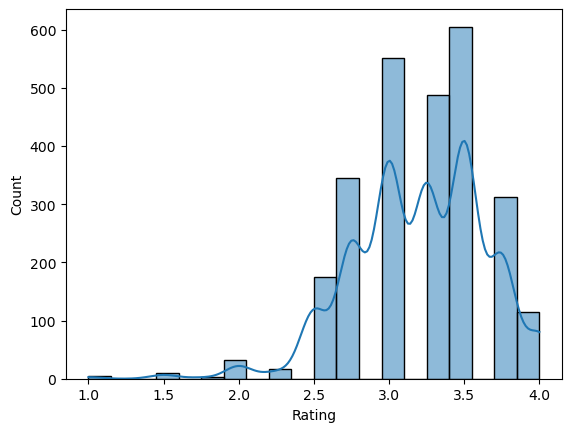

In [11]:
# show values for 'Rating'

sns.histplot(df_fc4['Rating'], bins=20, kde = True) # shows extreme values for 'Rating'

<Axes: xlabel='Number_of_Ingredients', ylabel='Count'>

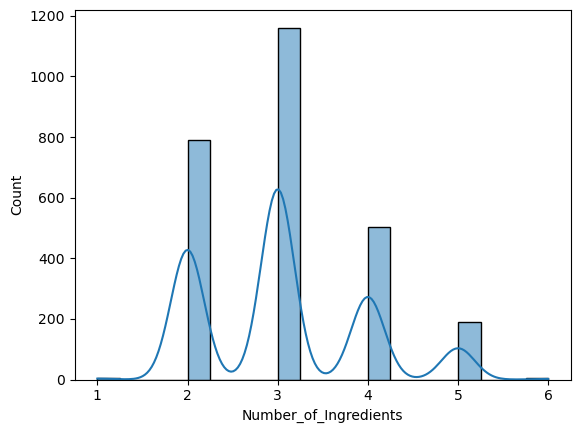

In [12]:
sns.histplot(df_fc4['Number_of_Ingredients'], bins=20, kde = True) # shows extreme values for 'Number_of_Ingredients'

<Axes: xlabel='Cocoa Percent', ylabel='Count'>

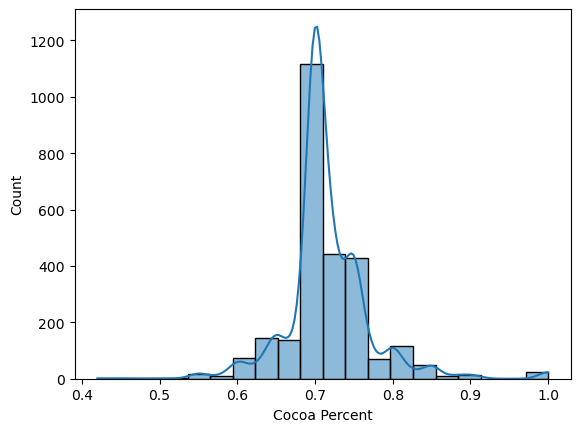

In [13]:
sns.histplot(df_fc4['Cocoa Percent'], bins=20, kde = True) # shows extreme values for 'Cocoa Percent'

# 4. Applying standardization

In [14]:
# Create a new DataFrame to store the standardized data
df_fc4_standardized = df_fc4.copy()

# Standardize the 'Rating' column
df_fc4_standardized['Rating'] = (df_fc4_standardized['Rating'] - df_fc4_standardized['Rating'].mean()) / df_fc4_standardized['Rating'].std()

# Standardize the 'Number_of_ingredients' column
df_fc4_standardized['Number_of_Ingredients'] = (df_fc4_standardized['Number_of_Ingredients'] - df_fc4_standardized['Number_of_Ingredients'].mean()) / df_fc4_standardized['Number_of_Ingredients'].std()

# Standardize the 'Cocoa Percent' column
df_fc4_standardized['Cocoa Percent'] = (df_fc4_standardized['Cocoa Percent'] - df_fc4_standardized['Cocoa Percent'].mean()) / df_fc4_standardized['Cocoa Percent'].std()


# 5. k-means clustering/modeling (on standardization)

In [15]:
# Defining the range of potential clusters in the data.
num_cl = range(1, 5) 

# Defining k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [16]:
# Creating a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_fc4_standardized).score(df_fc4_standardized) for i in range(len(kmeans))] 

score

/Users/bdigregorio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bdigregorio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bdigregorio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bdigregorio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

[-7968.000000000013,
 -6007.064259096232,
 -4691.1286809536105,
 -3777.417939906377]

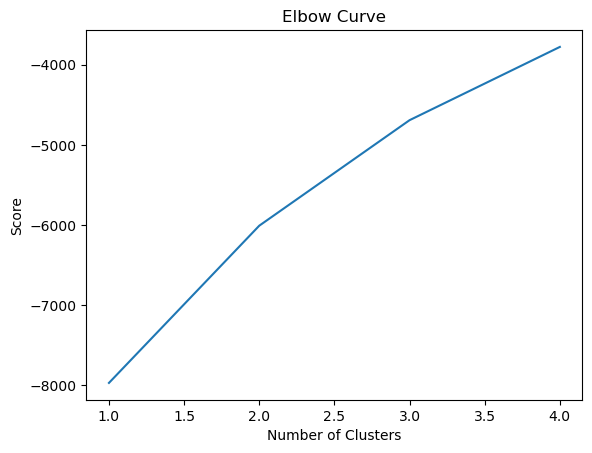

In [17]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Elbow curve shows 3 clusters is optimal.

In [18]:
# Creating the k-means object.
kmeans = KMeans(n_clusters=3, n_init=10)

In [19]:
# Fitting the k-means object to the data.
kmeans.fit(df_fc4_standardized)

KMeans(n_clusters=3, n_init=10)

In [20]:
# Create a new DataFrame for the cluster data with a different name 
df_cluster_result = df_fc4.copy()  # Copy the original data to the new DataFrame

# Add the 'clusters' column to df_clusters
df_cluster_result['clusters'] = kmeans.fit_predict(df_fc4_standardized)



In [21]:
# checking for 'clusters' column
df_cluster_result.head()

,Cocoa Percent,Number_of_Ingredients,Rating,clusters
0,0.72,3,3.25,1
1,0.72,3,2.75,0
2,0.72,3,3.00,0
3,0.72,3,3.25,1
4,0.85,3,3.50,0


In [22]:
df_cluster_result['clusters'].value_counts()

1    1170
0     850
2     637
Name: clusters, dtype: int64

# 6. Cluster Plotting

### Plotting "Cocoa Percent" and "Rating" on original values

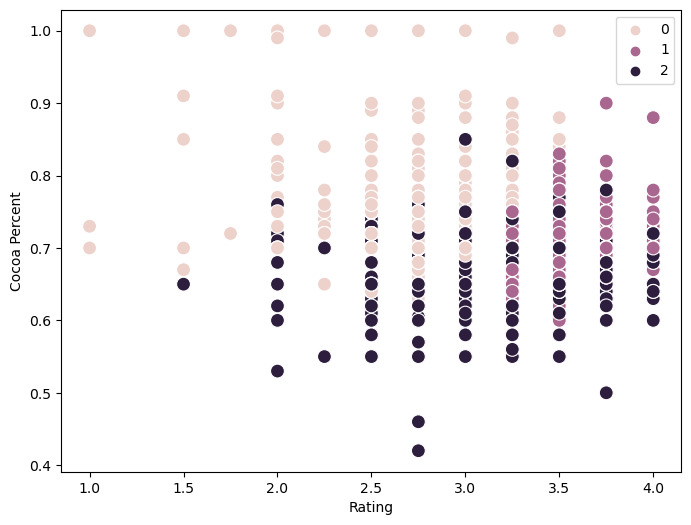

In [23]:
# Here is a cluster based on the original values,(df_cluster_result was made from a copy of the original df_fc4) 
# So this chart is a plot using original data via the standardized k-means model.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df_cluster_result['Rating'], y=df_cluster_result['Cocoa Percent'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rating') # Label x-axis.
plt.ylabel('Cocoa Percent') # Label y-axis.
plt.show()

### From the "Cocoa Percent" and "Rating" plot above, it is interesting to see the tan group is apparently clustered together by a comparatively high cocoa percent, but it really has no affect on rating as it streches across the whole plot.<br> -- The black cluster, too, stretches across ratings while it is mostly in the lower cocoa percent. <br> -- The purple cluster overlaps with black while maintaing mid-cocoa percent and higher ratings.<br>-- In this plot it is a bit difficult to discern any really meaningful separation of the clusters: telling us there is hardly a linear dependency between these two variables except the highest ratings have mid-level cocoa percents.

### Plotting "Number_of_Ingredients" and "Rating" on original values

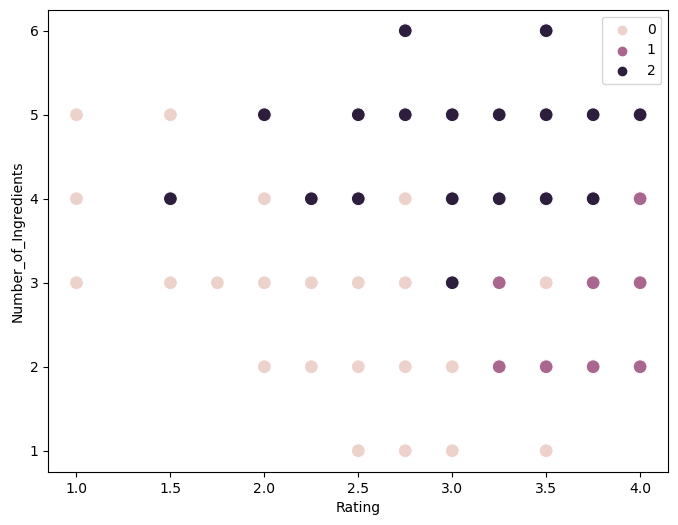

In [24]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df_cluster_result['Rating'], y=df_cluster_result['Number_of_Ingredients'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rating') # Label x-axis.
plt.ylabel('Number_of_Ingredients') # Label y-axis.
plt.show()

### It is interesting to see how the clusters with 'Number_of_Ingredients' and 'Rating' above have been created. <br>-- The purple group stands out as being a mid-to-low-ingredients/higher-rating cluster. <br> -- The black cluster shows mid-to-high-ingredients while ***also*** showing mid-to-higher-ratings. <br> -- The tan cluster shows the lower ratings but number of ingredients covers almost the entire range.. <br> -- This tells us the number of ingredients may be a significant feature but doesn't seem to have a real impact on the rating.


### Plotting "Number_of_Ingredients" and "Cocoa Percent" on original values

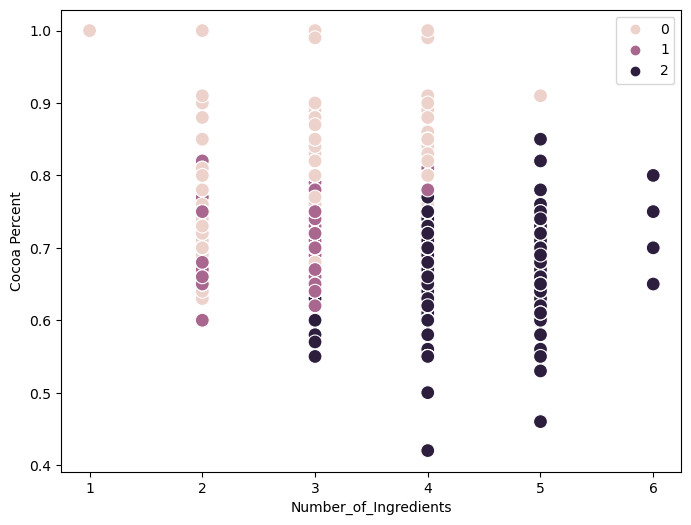

In [25]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df_cluster_result['Number_of_Ingredients'], y=df_cluster_result['Cocoa Percent'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number_of_Ingredients') # Label x-axis.
plt.ylabel('Cocoa Percent') # Label y-axis.
plt.show()

### 'Cocoa Percent' and 'Number_of_Ingredients' above shows similar clusters. <br> -- Tan cluster shows us higher cocoa percents but does not seem to affect the number of ingredients as it covers almost all the number of ingredients except the very highest..<br>-- The purple cluster has mid-range cocoa percent with low number of ingredients while the black has a higher number of ingredients but the same mid-range, and even lower-range, cocoa percent.<br>-- The number of ingredients does not appear to have much of an affect on the cocoa percent

### Descriptive Analyses

In [26]:
# creating df descriptive analysis of the clusters by color

df_cluster_result.loc[df_cluster_result['clusters'] == 2, 'cluster'] = 'black'
df_cluster_result.loc[df_cluster_result['clusters'] == 1, 'cluster'] = 'purple'
df_cluster_result.loc[df_cluster_result['clusters'] == 0, 'cluster'] = 'tan'

In [27]:
df_cluster_result.groupby('cluster').agg({'Rating' :['mean', 'median'],
                                'Number_of_Ingredients':['mean', 'median'],
                                'Cocoa Percent': ['mean', 'median']})

Rating        Number_of_Ingredients        Cocoa Percent       
             mean median                  mean median          mean median
cluster                                                                   
black    3.114207    3.0              4.237049    4.0      0.684105   0.70
purple   3.522436    3.5              2.641880    3.0      0.711863   0.70
tan      2.815882    3.0              2.677647    3.0      0.746006   0.72

# 7. Summary

### I'm afraid to say there does not appear to be a direct linear dependency between any of these variables. 

### All the analyses to this point have been built on the numerical data from the original dataset, which has only these three columns. However, given the potential measurement or collection bias due to the subjective taste preferences amongst the rating participants, perhaps the clues to a highly-rated artisan chocolate bar lie in the ingredients themselves. The categorical colums of 'Ingredients_abbr' and 'Most Memorable Characteristics' may be able to tell us what constitutes high ratings.

# 8. Export data

In [28]:
# export df_cluster_result
df_cluster_result.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_cluster_result.csv'))